In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [3]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alessandropontini","key":"97d4a2f050bffb944afe13160739c4f2"}'}

In [6]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [7]:
! kaggle datasets list -s classification

ref                                                   title                                   size  lastUpdated          downloadCount  
----------------------------------------------------  -------------------------------------  -----  -------------------  -------------  
uciml/mushroom-classification                         Mushroom Classification                 34KB  2016-12-01 23:08:00          40688  
uciml/glass                                           Glass Classification                     3KB  2017-01-27 17:27:48          10849  
asdasdasasdas/garbage-classification                  Garbage Classification                  82MB  2018-11-24 05:09:23           3592  
puneet6060/intel-image-classification                 Intel Image Classification             346MB  2019-01-30 09:22:58          11552  
uciml/zoo-animal-classification                       Zoo Animal Classification                2KB  2016-12-24 18:05:10          12872  
iabhishekofficial/mobile-price-classifica

In [8]:
! kaggle datasets download puneet6060/intel-image-classification

 97% 337M/346M [00:07<00:00, 77.9MB/s]
100% 346M/346M [00:07<00:00, 47.7MB/s]


In [0]:
! unzip /content/intel-image-classification.zip -d /content/intel-image-classification

In [0]:
np.random.seed(42)
path = Path("/content/intel-image-classification")

In [0]:
src = ImageList.from_folder(path).split_by_folder(train = 'seg_train',valid = 'seg_test').label_from_folder().add_test_folder(test_folder = 'seg_valid')
data  = (src.transform(get_transforms(),size = 74).databunch().normalize(imagenet_stats))

In [0]:
data  = (src.transform(get_transforms(),size = 124).databunch().normalize(imagenet_stats))

In [14]:
data.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

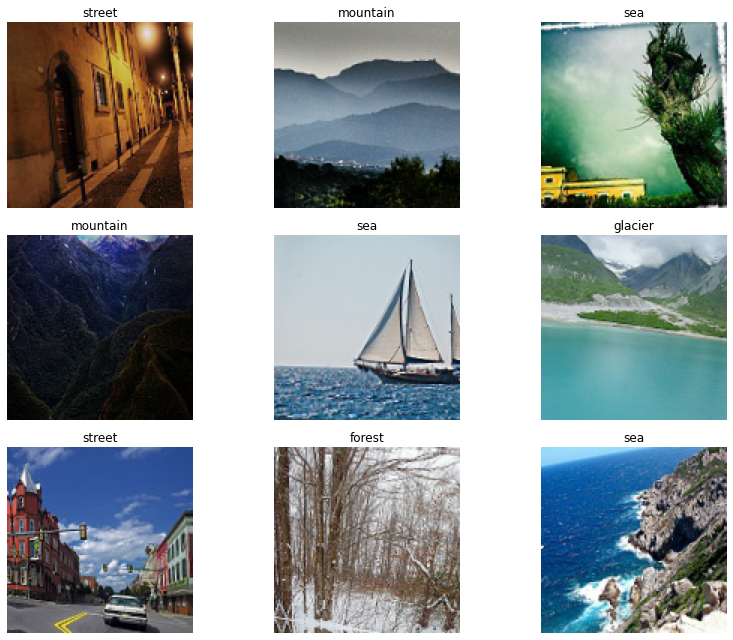

In [15]:
data.show_batch(rows=3, figsize=(12,9))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 6,
 14034,
 3000)

In [17]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


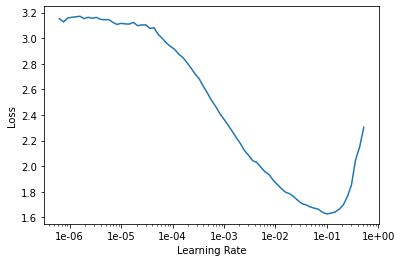

In [19]:
learn.recorder.plot()

In [21]:
lr = 1e-02
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.479778,0.358218,0.872333,0.127667,00:49
1,0.371374,0.270086,0.913000,0.087000,00:49
2,0.291606,0.215401,0.927000,0.073000,00:48
3,0.225991,0.199388,0.931333,0.068667,00:48
4,0.177670,0.195701,0.934000,0.066000,00:48


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


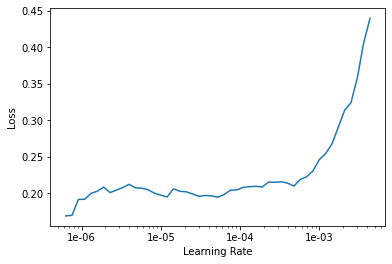

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, slice(1e-05, lr/5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.217038,0.203795,0.924000,0.076000,00:51
1,0.242927,0.205007,0.924000,0.076000,00:51
2,0.184396,0.175443,0.936333,0.063667,00:50
3,0.107955,0.167003,0.942333,0.057667,00:50
4,0.079205,0.175272,0.946333,0.053667,00:50


In [0]:
learn.save("stage-2-res50")

In [0]:
data  = (src.transform(get_transforms(),size = 150).databunch().normalize(imagenet_stats))

In [0]:
learn.data = data

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


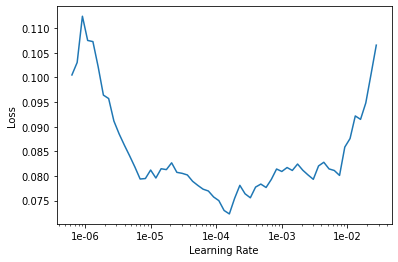

In [30]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-04/2

In [32]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.090811,0.177113,0.942333,0.057667,00:56
1,0.069486,0.177941,0.943333,0.056667,00:55
2,0.081743,0.175642,0.941667,0.058333,00:54
3,0.080947,0.174263,0.942333,0.057667,00:54
4,0.078686,0.178128,0.943000,0.057000,00:55


In [0]:
learn.save("stage-1-s150-res50")

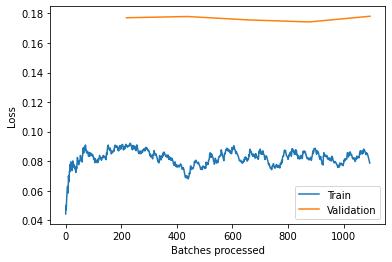

In [34]:
learn.recorder.plot_losses()

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


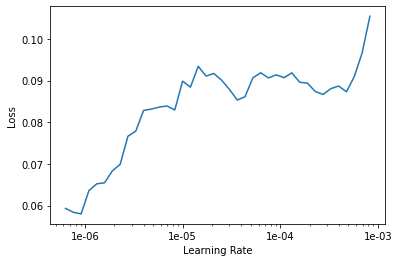

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
lr = 1e-06
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.072514,0.173259,0.943000,0.057000,01:02
1,0.089117,0.175001,0.941000,0.059000,01:04
2,0.086513,0.172760,0.944000,0.056000,01:03
3,0.081720,0.175347,0.943000,0.057000,01:03
4,0.089470,0.180537,0.943000,0.057000,01:04


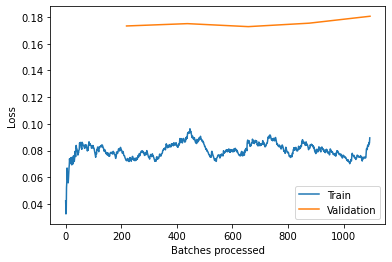

In [38]:
learn.recorder.plot_losses()

In [0]:
learn.save("stage-2-s150-res50")

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

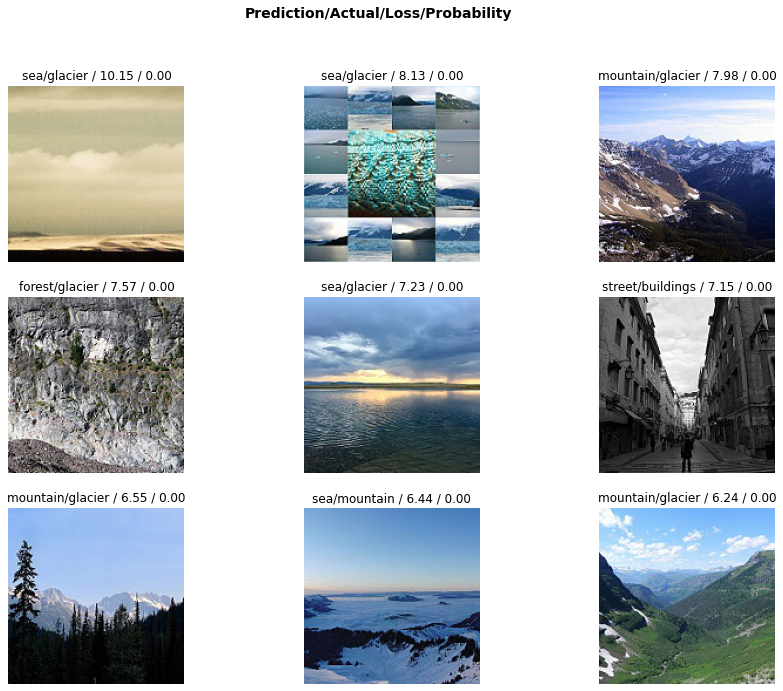

In [41]:
interp.plot_top_losses(9, figsize=(15,11))

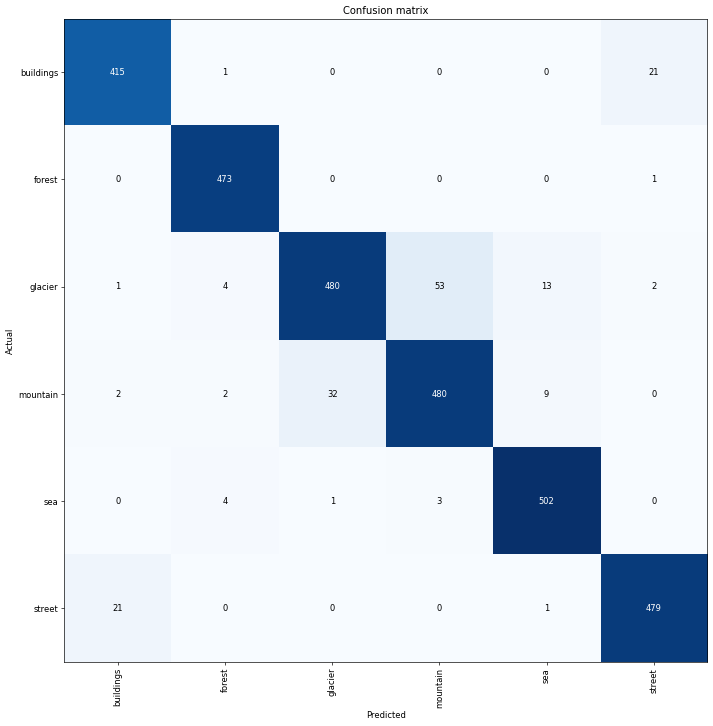

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)